# Desafio

### Análises dos dados sobre agência responsável por licenciar e regular os táxis na cidade de NY:

In [0]:
import pyspark.sql.functions as F

## Análise 1
### Qual a média de valor total (_total_amount_) recebido em um mês considerando todos os yellow táxis da frota?



mes,vl_total_medio
2023-01,27.46
2023-02,27.37
2023-03,28.29
2023-04,28.78
2023-05,29.45


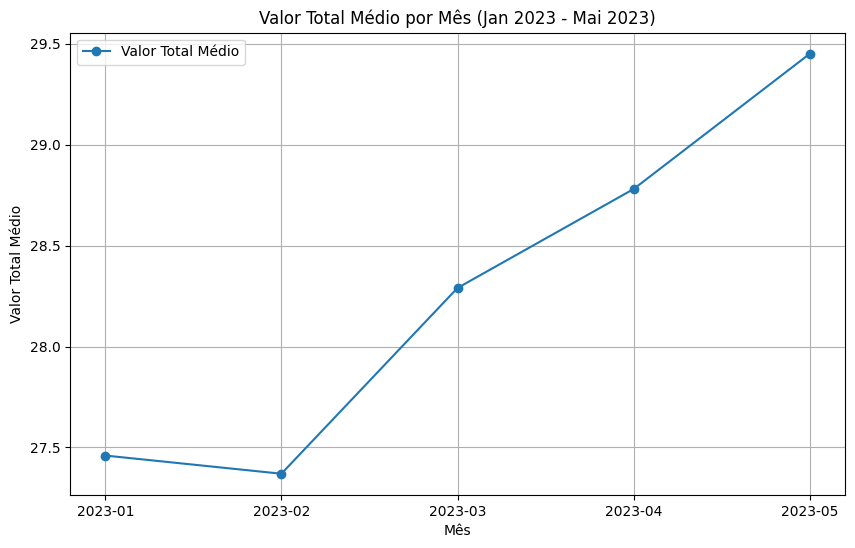

In [0]:
media_mes = (
    spark.table("workspace.refined_layer.tb_trips_taxis")
    .filter((F.col("nm_type_service") == 'yellow') & (F.date_format(F.col("dt_hr_pickup_datetime"), "yyyy-MM") >= "2023-01") & (F.date_format(F.col("dt_hr_pickup_datetime"), "yyyy-MM") <= "2023-05"))
    .groupBy(F.date_format(F.col("dt_hr_pickup_datetime"), "yyyy-MM").alias("mes"))
    .agg(F.round(F.avg("vl_total_amount"), 2).alias("vl_total_medio"))
    .orderBy(F.date_format(F.col("dt_hr_pickup_datetime"), "yyyy-MM"))
)

display(media_mes)

media_mes_pd = media_mes.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(media_mes_pd['mes'], media_mes_pd['vl_total_medio'], marker='o', label='Valor Total Médio')
plt.xlabel('Mês')
plt.ylabel('Valor Total Médio')
plt.title('Valor Total Médio por Mês (Jan 2023 - Mai 2023)')
plt.legend()
plt.grid(True)
plt.show()

## Análise 2

#### Qual a média de passageiros (*passenger_count*) por cada hora do dia que pegaram táxi no mês de maio considerando todos os táxis da frota?

dt_pickup_hour,avg_passengers,total_trips
0,1.43,89632
1,1.44,58266
2,1.45,37571
3,1.45,24551
4,1.4,16071
5,1.28,18566
6,1.26,46483
7,1.28,94138
8,1.29,128354
9,1.31,144068


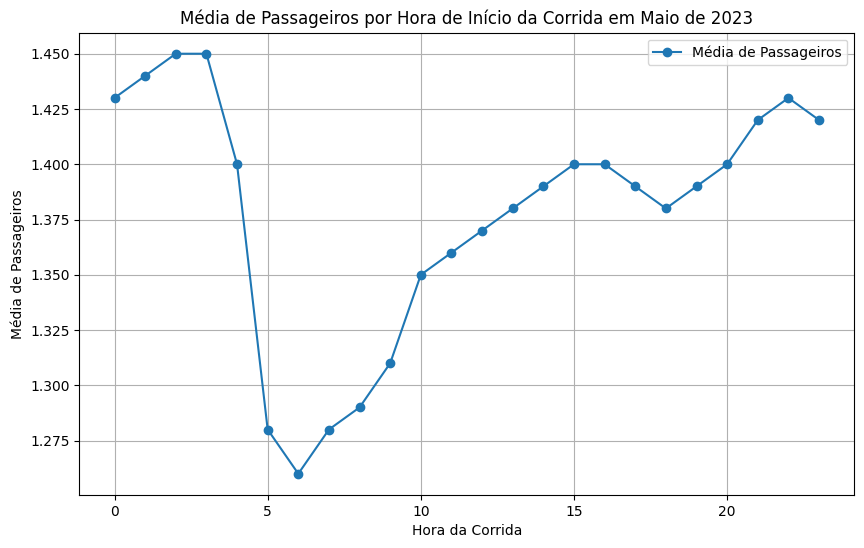

In [0]:
passengers_by_hour = (
    spark.table("workspace.refined_layer.tb_trips_taxis")
    .filter(
        (F.year("dt_hr_pickup_datetime") == 2023) & 
        (F.month("dt_hr_dropoff_datetime") == 5)
    )
    .groupBy(F.hour("dt_hr_pickup_datetime").alias("dt_pickup_hour"))
    .agg(
        F.round(F.avg("qt_passanger_count"), 2).alias("avg_passengers"),
        F.count("*").alias("total_trips")
    )
    .orderBy("dt_pickup_hour")
)

display(passengers_by_hour)

passengers_by_hour_pd = passengers_by_hour.toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(passengers_by_hour_pd['dt_pickup_hour'], passengers_by_hour_pd['avg_passengers'], marker='o', label='Média de Passageiros')
plt.xlabel('Hora da Corrida')
plt.ylabel('Média de Passageiros')
plt.title('Média de Passageiros por Hora de Partida da Corrida em Maio de 2023')
plt.legend()
plt.grid(True)
plt.show()